<a href="https://colab.research.google.com/github/OllinSynBioIPN/TETL-BOX/blob/main/Modelo_final_aut%C3%B3matas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Arabinosa
import numpy as np
import random as rd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img 
import moviepy.editor as mvp
import glob
import time
 
#tamaño de la cuadrícula
nxC = 100
nyC = 100
 
#creo los medios
medioact = np.zeros((nxC, nyC))
 
#Posición de los promotores y productores
#AraC
medioact[10, 10] = 5
 
#A1+gfp
for la in range(60,90,1):
  medioact[la, 30] = 1
medioact[90, 30] = 3
 
#A1
for te in range(60,90,1):
  medioact[te, 60] = 2
medioact[90, 60] = 4
 
medionue = medioact
medioori = medioact

#vida media en minutos
VMAraC = 30
VMGFP = 200
VMA1 = 50
VMArabinosa = 100

VPAraC = 3
VPGFP = 4
VPA1 = 10

#tiempo total que dura la simulación
#y tiempo que transcurre
ttotal = 1500
ttrans = 0

#Analizar vecinos cercanos
def vecinos(x, y):
    vec = [medioact[(x - 1) % nxC, (y - 1) % nyC]
          , medioact[x % nxC, (y - 1) % nyC]
          , medioact[(x + 1) % nxC, (y - 1) % nyC]
          , medioact[(x - 1) % nxC, y % nyC]
          , medioact[(x + 1) % nxC, y % nyC]
          , medioact[(x - 1) % nxC, (y + 1) % nyC]
          , medioact[x % nxC, (y + 1) % nyC]
          , medioact[(x + 1) % nxC, (y + 1) % nyC]]
    return vec

def degradacion (x,y,molecula):
    molecula = molecula * 2
    if rd.choice(range(molecula)) > (molecula-2):
      medionue[x,y] = 0
    else:
      medionue[x,y] = medioact[x,y]
    return medionue[x,y]

def produccion (xpos, ypos, nxC):
    xpos = rd.choice(range(nxC))
    ypos = rd.choice(range(nxC))
    while medioact[xpos, ypos] != 0:
      xpos = rd.choice(range(nxC))
      ypos = rd.choice(range(nxC))
    return xpos, ypos

#Creación del vídeo 1 = sí, 0 = no
video = 0

In [ ]:
#Arabinosa
#inicializa listas y variables
Arabinosa = [0]
AraC = [0]
GFP = [0]
A1 = [0]
t = [0]
 
contIAraC = 0
contAArabinosa = 0
contAA1 = 0
contArabinosa = 0
contAraC = 0
contGFP = 0
contA1 = 0

pos = (-1, 0, 1)

mov = [0,6,7,8,9]
#se inicia la simulación que dura el tiempo total
while ttrans < ttotal:
  #se recorren todas las celdas
  for x in range(nxC):
    for y in range(nyC):      

      xpos, ypos = 0, 0

      #distribución de Arabinosa (acción de agregar arabinosa al medio)
      if ttrans == 10:    
        porcArabinosa = rd.choice(range(10000))
        if porcArabinosa > 9900 and medioact[x,y] == 0:
          medionue[x,y] = 6
 
      #comportamiendo de la celda vacía
      if medioact[x,y] == 0:    
        while xpos == 0 and ypos == 0:            
          xpos = rd.choice(pos)
          ypos = rd.choice(pos)
        if medioact[(x+xpos) % nxC, (y+ypos) % nyC] in mov:  
          medionue[x,y], medionue[(x+xpos) % nxC, (y+ypos) % nyC] = medioact[(x+xpos) % nxC, (y+ypos) % nyC], medioact[x,y]

      #comportamiento de promotor (A1+GFP)
      elif medioact[x,y] == 1:
        vec = vecinos(x,y)
        for aA1 in vec:
          if aA1 == 9:
            contAA1 = contAA1 + 1    
            
      #comportamiento de promotor (A1)
      elif medioact[x,y] == 2:
        vec = vecinos(x,y)
        for bAraC in vec:
          if bAraC == 7:
            contIAraC = contIAraC + 1
          elif bAraC == 6:
            contAArabinosa = contAArabinosa + 1  

      #comportamiento de productor A1+gfp
      elif medioact[x,y] == 3:  
        if contAA1 > 0:
          aux = 0
          while aux < VPA1:
            xpos, ypos = produccion(xpos, ypos, nxC)
            medionue[xpos, ypos] = 9
            aux = aux + 1

          aux = 0
          while aux < VPGFP:
            xpos, ypos = produccion(xpos, ypos, nxC)
            medionue[xpos, ypos] = 8
            aux = aux + 1       

      #comportamiento de productor A1
      elif medioact[x,y] == 4:
        if contIAraC > 0 and contAArabinosa > 0:
          aux = 0 
          while aux < VPA1:         
            xpos, ypos = produccion(xpos, ypos, nxC)
            medionue[xpos, ypos] = 9
            aux = aux + 1

      #comportamiento de productor AraC
      elif medioact[x,y] == 5: 
        aux = 0
        while aux < VPAraC: 
          xpos, ypos = produccion(xpos, ypos, nxC)
          medionue[xpos, ypos] = 7
          aux = aux + 1
 
      #degradación de Ara
      elif medioact[x,y] == 6:
        medionue[x,y] = degradacion(x,y,VMArabinosa)

      #degradación de AraC
      elif medioact[x,y] == 7:
        medionue[x,y] = degradacion(x,y,VMAraC)

      #degradación de GFP
      elif medioact[x,y] == 8:
        medionue[x,y] = degradacion(x,y,VMGFP) 
 
      #degradación de A1
      elif medioact[x,y] == 9:
        medionue[x,y] = degradacion(x,y,VMA1)
 
  #actualiza el contador y el medio    
  ttrans = ttrans + 1
  medioact = medionue
  medionue = medioori
  print(ttrans)

  #conteo de moléculas
  contIAraC = 0
  contAArabinosa = 0
  contAA1 = 0
  contAraC = 0
  contArabinosa = 0
  contGFP = 0
  contA1 = 0
 
  for x in range(nxC):
    for y in range(nyC):
      if medioact[x,y] == 6:
        contArabinosa = contArabinosa + 1
      elif medioact[x,y] == 9: 
        contA1 = contA1 + 1
      elif medioact[x,y] == 8:
        contGFP = contGFP + 1 
      elif medioact[x,y] == 7:
        contAraC = contAraC + 1
 
  Arabinosa.append(contArabinosa)
  A1.append(contA1)
  GFP.append(contGFP)
  AraC.append(contAraC)
  t.append(ttrans)
  
  #crea matriz para la imágen
  if video == 1:
    snap = np.zeros((nxC, nyC, 3), dtype=np.uint8)
    for y in range(0, nxC):
      for x in range(0, nyC):
  
        #color para cada partícula
        #vacío
        if medioact[x,y] == 0:
          snap[x, y] = [255, 255, 255]
        #Promotor para las proteínas A1 y GFP  
        elif medioact[x,y] == 1:
          snap[x, y] = [0, 0, 0]
        #Promotor para la proteína A1 
        elif medioact[x,y] == 2:
          snap[x, y] = [0, 0, 0]
        #Casilla productora de proteína A1 y GFP
        elif medioact[x,y] == 3:
          snap[x, y] = [0, 0, 0]
        #Casilla productora de proteína A1
        elif medioact[x,y] == 4:
          snap[x, y] = [0, 0, 0]
        #Casilla productora de Ara C
        elif medioact[x,y] == 5:
          snap[x, y] = [0, 0, 0]
        #Arabinosa
        elif medioact[x,y] == 6:
          snap[x, y] = [0, 255, 0]  
        #AraC
        elif medioact[x,y] == 7:
          snap[x, y] = [255, 0, 0] 
        #GFP
        elif medioact[x,y] == 8:
          snap[x, y] = [0, 0, 255]
        #A1
        elif medioact[x,y] == 9:
          snap[x, y] = [255, 0, 255] 
  
    #crea la imagen y la guarda
    im = Image.fromarray(snap, 'RGB')
    im.save('snap_%04d.png'%ttrans)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


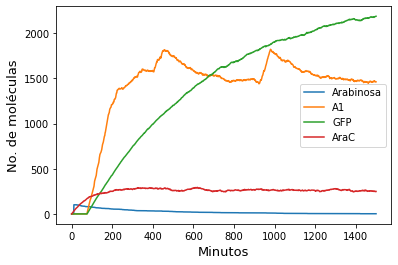

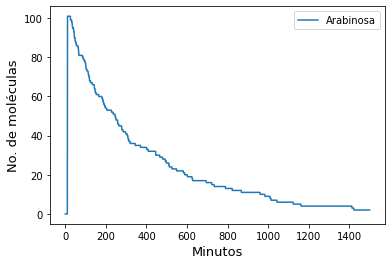

In [ ]:
plt.plot(t,Arabinosa,label="Arabinosa")
plt.plot(t,A1,label="A1")
plt.plot(t,GFP,label="GFP")
plt.plot(t,AraC,label="AraC")
plt.xlabel("Minutos",fontsize=13)
plt.ylabel("No. de moléculas",fontsize=13)
plt.legend()
plt.show()

plt.plot(t,Arabinosa,label="Arabinosa")
plt.xlabel("Minutos",fontsize=13)
plt.ylabel("No. de moléculas",fontsize=13)
plt.legend()
plt.show()

In [ ]:
#crea el video 
frames = sorted(glob.glob('snap_*.png'))
mvp.ImageSequenceClip(frames, fps=20.0).write_videofile('simulación.mp4')
"""Para descargar el vídeo se debe de dar click en la pestaña de la izquierda con forma de carpeta"""

[MoviePy] >>>> Building video simulación.mp4
[MoviePy] Writing video simulación.mp4


100%|██████████| 1500/1500 [00:02<00:00, 732.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: simulación.mp4 



'Para descargar el vídeo se debe de dar click en la pestaña de la izquierda con forma de carpeta'

In [ ]:
a = (0, range(5, 10, 1))
print (a) 

(0, range(5, 10))


In [ ]:
c = 10
def suma(a,b,c):
    if c == 0:
      c = a+b
    else:
      c = 5
    return c, c+1
k, t = suma(1,2,c)   
print (k,t)

5 6
